# Wrangle & Analyze Data


---
<a id='intro'></a>
## Introduction
The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

In [115]:
import pandas as pd
import numpy as np
import requests
import os

In [114]:
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

---
<a id='gather'></a>
## Gather Data

### 1. Enhanced Twitter Archive

#### twitter-archive-enhanced.csv

> The WeRateDogs Twitter archive is provided as the starting point, and is download manually from the Udacity server: twitter_archive_enhanced.csv

In [2]:
# load the provided enhanced twitter archive file into a DataFrame
df_twitter_archive = pd.read_csv(r'C:\Users\User\Desktop\p4\twitter-archive-enhanced.csv')
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [3]:
df_twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

##### Sample Tweet Data

Here is a sample of one of the tweets, with additional output to display the entire field's data.

In [5]:
sample_tweet = df_twitter_archive.iloc[5]
sample_tweet

tweet_id                                                     891087950875897856
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-29 00:08:17 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here we have a majestic great white breaching ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891087950...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [6]:
sample_tweet.text 

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

### 2. Image Predictions File

#### image_predictions.tsv



In [7]:
# download the image predictions file with the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [8]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [9]:
#  HTTP status code 200 indicates the request has succeeded 
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images), mode = 'wb') as file:
    file.write(response.content)

In [10]:
ls *.tsv

 Volume in drive C has no label.
 Volume Serial Number is 84D3-C144

 Directory of C:\Users\User\Desktop\wrangle_act__2_

20-04-2020  11:22           335,079 image-predictions.tsv
               1 File(s)        335,079 bytes
               0 Dir(s)  47,236,173,824 bytes free


In [11]:
# read image predictions file into a DataFrame
df_predictions = pd.read_csv(file_images, sep = '\\t', engine = 'python')
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [13]:
# check one observation
df_predictions.iloc[5]

tweet_id                                 666050758794694657
jpg_url     https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg
img_num                                                   1
p1                                     Bernese_mountain_dog
p1_conf                                            0.651137
p1_dog                                                 True
p2                                         English_springer
p2_conf                                            0.263788
p2_dog                                                 True
p3                               Greater_Swiss_Mountain_dog
p3_conf                                           0.0161992
p3_dog                                                 True
Name: 5, dtype: object

### 3. Download Tweet JSON Data

> Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

I would not like to use the twitter api for personal reasons. So I am using the already available tweet_json file

#### Read in JSON data to DataFrame
Extract the required fields from each tweet's JSON data and store in a separate file, tweet_data_extra.csv, for use during the assessment phase.

In [15]:
import json
tweet_json_file = 'C:\\Users\\User\\Desktop\\p4\\tweet-json.txt'
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head(30)

tweet_id  retweet_count  favorite_count
0   892420643555336193           8853           39467
1   892177421306343426           6514           33819
2   891815181378084864           4328           25461
3   891689557279858688           8964           42908
4   891327558926688256           9774           41048
5   891087950875897856           3261           20562
6   890971913173991426           2158           12041
7   890729181411237888          16716           56848
8   890609185150312448           4429           28226
9   890240255349198849           7711           32467
10  890006608113172480           7624           31166
11  889880896479866881           5156           28268
12  889665388333682689           8538           38818
13  889638837579907072           4735           27672
14  889531135344209921           2321           15359
15  889278841981685760           5637           25652
16  888917238123831296           4709           29611
17  888804989199671297           4559           26080
18  888554962724278272           3732           20290
19  888078434458587136           3653           22201
20  887705289381826560           5609           30779
21  887517139158093824          12082           46959
22  887473957103951883          18781           69871
23  887343217045368832          10737           34222
24  887101392804085760           6167           31061
25  886983233522544640           8084           35859
26  886736880519319552           3443           12306
27  886680336477933568           4610           22798
28  886366144734445568           3316           21524
29  886267009285017600              4             117

In [16]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
df_tweet_data_extra.to_csv('tweet_data_extra.csv', index = False)

---
<a id='assess'></a>
## Assess Data
In this section I assess the data that was gathered, both visually and programmatically for quality and tidiness issues. One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

Tidiness of data is assessed with regard to structure according to the rules defined by Hadley Wikham.

<a id='summary'></a>

---
## Assessment Summary

### Quality

### `archive`

1.There are 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**).

2.There are 78 reply tweets (**in_reply_to_status_id, in_reply_to_user_id**).

3.There are 2297 tweets with **expanded_urls** (links to the tweet), indicating 59 tweets with missing data.
56 of these tweets are replies or retweets.
The remaining 3 tweets have not got the url within the **text** column. They are NOT in the **predictions** table, but even though they ARE in the **json_data**, there was NO image url in the JSON data.

4.The **timestamp** column is in string format.

5.There are 109 tweets with regular words in the **name** column that are NOT a valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

6.There are 775 tweets with the dog **name** as "None". (Probably not worth looking at as there are too many to verify.) [_**This issue will not be cleaned**_]

7.There are only 4 types of values in the **source** column, and they can be simplified by using the display string portion just before the final "<\a>":
  - Twitter for iPhone
  - Vine - Make a Scene
  - Twitter Web Client
  - TweetDeck 

### `predictions`

8.There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".  

### `json_data`
9.Several tweets (16 _during this run_) from the original `archive` table have been deleted since the archive was created (TweepErrors were reported). 


### Tidiness

### `archive`

1.There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**). The 4 columns for one variable doesn't conform to the rules of "tidy data". 

2.The **Key Points** indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**.

3.Reply tweets are also not “original tweets” either; this data is stored in the columns **in_reply_to_status_id, in_reply_to_user_id**.

4. When all **rating_denominator**s are the same (10) this column is no longer needed.

5. Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

### `predictions`

1.The table does not follow the rules of “Tidy Data”; the columns **p1**, **p2** and **p3** contain the same type of data, predictions. The columns **p1_conf**, **p2_conf** and **p3_conf** all contain values for confidence level, and columns **p1_dog**, **p2_dog** and **p3_dog** all contain Boolean values indicating whether the prediction is in fact a type of dog. [_**This issue will not be cleaned**_]

2. The column **jpg_url** contains a link to an image file (JPG), but it’s not the same link as the **expanded_urls**  field in the `archive` dataset. It is actually the same link as the **media_url_https** field in the tweet’s JSON data. [_**This issue will not be cleaned**_]

3. The dog breed prediction with the highest confidence level can be combined with the  `archive` table as the twitter table contains information that is all about the dog in the tweet.

### `json_data`

1.The `json_data` table should be combined with the `archive` table.


In [18]:
# Load the data gathered data files
archive = pd.read_csv(r'C:\Users\User\Desktop\p4\twitter-archive-enhanced.csv')
predictions = pd.read_csv(r'C:\Users\User\Desktop\p4\image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('tweet_data_extra.csv')

<a id='assess_archive'></a>
### `archive`

In [19]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

---
**NOTES:**

The `info()` method reveals several quality and tidiness issues:

- There are 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**)
- There are 78 replies (**in_reply_to_status_id, in_reply_to_user_id**)
- There are 2297 tweets with **expanded_urls** (links to images) indicating 59 tweets with missing data
- The **timestamp** field is in string format (object)
- There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**)
- The columns related to retweets are not applicable for original tweets
- The columns related to replies are not applicable for original tweets

In [20]:
print("Data type for timestamp:  " + str(type(archive.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [21]:
print("Duplicated:  {}".format(sum(archive.duplicated())))

Duplicated:  0


In [23]:
archive.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [24]:
archive.tail(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

**NOTES:**
> The `head()` and `tail()` methods show us several issues:
>
> Quality:
> - The **timestamp** column has dates in string form.
> - Some of the rows from the `tail()` output above have invalid strings in the **name** column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet.
> - Values of "None" in the **name** column.
>
> Tidiness:
> - The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.

---
#### `name`
> First we'll check the **name** column, starting with value counts.

In [25]:
archive.name.value_counts().head(50)

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Buddy         7
Toby          7
Bailey        7
an            7
Scout         6
Stanley       6
Jack          6
Milo          6
Jax           6
Leo           6
Bella         6
Dave          6
Rusty         6
Oscar         6
Koda          6
Alfie         5
Gus           5
Finn          5
Phil          5
Chester       5
Bentley       5
Sammy         5
Sunny         5
George        5
Oakley        5
very          5
Larry         5
Louis         5
Cassie        4
Maximus       4
Riley         4
Gerald        4
Clarence      4
Jerry         4
Moose         4
Reggie        4
Name: name, dtype: int64

**NOTES:**

> It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Let us try to get the list of these names.

In [26]:
# list all names that are NOT capitalized
err_names = archive.name.str.contains('^[a-z]', regex = True)
archive[err_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [27]:
len(archive[err_names])

109

**NOTES:**

> This list contains non-capitalized words from the **name** column for 109 tweets, which means there are 109 enteries which are not names.

---
#### `expanded_urls`
> Next, check the tweets that are missing data in **expanded_urls**, are they replies or retweets?

In [28]:
# number of tweets with missing urls
sum(archive.expanded_urls.isna())

59

In [29]:
# how many tweets with missing urls are replies or retweets?
sum(archive.expanded_urls.isna() & \
    (archive.in_reply_to_status_id.notnull() | \
     archive.retweeted_status_id.notnull()))

56

In [30]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = archive.expanded_urls.isna() & \
       archive.in_reply_to_status_id.isna() & \
       archive.retweeted_status_id.isna()
archive[mask][['tweet_id', 'text', 'expanded_urls']]

tweet_id                                               text  \
375   828361771580813312  Beebop and Doobert should start a band 12/10 w...   
707   785515384317313025     Today, 10/10, should be National Dog Rates Day   
1445  696518437233913856    Oh my god 10/10 for every little hot dog pupper   

     expanded_urls  
375            NaN  
707            NaN  
1445           NaN

**NOTES:**

> Of the 59 tweets that are missing data in **expanded_urls**, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) with NaN in the **expanded_urls** column all have valid ratings but no urls within the **text** column.
>
> The question now is whether these tweets are part of the **predictions** or **json_data** tables.

In [31]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = predictions.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [32]:
# are any of these tweets in the json_data table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = json_data.tweet_id.isin(tweet_set)
json_data[find_tweet_id]

tweet_id  retweet_count  favorite_count
374   828361771580813312            195            2408
706   785515384317313025           1477            6800
1443  696518437233913856           1887            4274

#### `source`

In [33]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**NOTES:**
> There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":
 - Twitter for iPhone
 - Vine - Make a Scene
 - Twitter Web Client
 - TweetDeck

#### `doggo`, `floofer`, `pupper`, and `puppo`

In [34]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [35]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [36]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [37]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [38]:
archive[archive.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

**NOTES:**
> Using the floofer category as an example, it looks like there are a few ways that this type is spelled: "floofer", "floofiest", and "Floofer".  
The other dog stage types may be similar in the variety of spelling.

---
<a id='assess_predictions'></a>
### `predictions`

In [39]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
predictions.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [41]:
predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [42]:
predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [43]:
predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [44]:
# check out 20 of the entries that don't predict dogs
predictions[~predictions.p1_dog & \
               ~predictions.p2_dog & \
               ~predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(10)

tweet_id                p1  p1_dog                   p2  p2_dog  \
6   666051853826850816        box_turtle   False           mud_turtle   False   
17  666104133288665088               hen   False                 cock   False   
18  666268910803644416  desktop_computer   False                 desk   False   
21  666293911632134144  three-toed_sloth   False                otter   False   
25  666362758909284353        guinea_pig   False                skunk   False   
29  666411507551481857              coho   False           barracouta   False   
45  666786068205871104             snail   False                 slug   False   
50  666837028449972224       triceratops   False            armadillo   False   
51  666983947667116034              swab   False            chain_saw   False   
53  667012601033924608             hyena   False  African_hunting_dog   False   

                p3  p3_dog  
6         terrapin   False  
17       partridge   False  
18        bookcase   False  
21  great_grey_owl   False  
25         hamster   False  
29             gar   False  
45           acorn   False  
50   common_iguana   False  
51             wig   False  
53          coyote   False

In [45]:
sum(~predictions.p1_dog & \
    ~predictions.p2_dog & \
    ~predictions.p3_dog)

324

**NOTES:**
> In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. When combined, there are 324 cases where there is NO valid dog breed from any of the three predictions.
>
> The best prediction for dog breed could be combined with the twitter archive table; this is essentially another variable pertaining to the dog on which the archive is based.

---
<a id='assess_json_data'></a>
### `json_data`

In [46]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [47]:
json_data.head(10)

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048
5  891087950875897856           3261           20562
6  890971913173991426           2158           12041
7  890729181411237888          16716           56848
8  890609185150312448           4429           28226
9  890240255349198849           7711           32467

<a id='clean'></a>

---
## Clean Data

In [49]:
# create copies of the dataframes for cleaning
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_data_clean = json_data.copy()

In [50]:
len_archive = archive_clean.shape[0]; len_archive

2356


There are 181 retweets, and we’re only interested in “original tweets”.

##### Define
> Drop all rows containing retweets, where these columns will be non-null: `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

##### Code

In [51]:
print("# of retweets:  {}".format(sum(archive_clean.retweeted_status_id.notnull())))

# of retweets:  181


In [52]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

##### Test

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [54]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  181



There are 78 reply tweets; we’re only interested in “original tweets”.

##### Define
> Drop all rows that are replies, those that have non-null values in these columns: `in_reply_to_status_id` and `in_reply_to_user_id`.
##### Code

In [55]:
print("# of replies:  {}".format(sum(archive_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [56]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

##### Test

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [58]:
# confirm the rows are dropped; compare with previous table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  78



All columns related to “retweets” will be empty (we're not interested in retweets).

##### Define
> Since we don't want retweets, we can drop all columns related to retweets: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

##### Code

In [59]:
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

##### Test

In [60]:
# Confirm all retweet related columns are gone
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']


All columns related to “replies” will be empty (we're not interested in replies).


##### Define
> Drop all columns related to replies: `in_reply_to_status_id` and `in_reply_to_user_id`.
##### Code

In [61]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

##### Test

In [62]:
# Confirm all reply related columns are gone
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

.
The *timestamp* column is in string format, it's the wrong data type.

##### Define
> Convert `timestamp` to datetime data type.
##### Code

In [63]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

##### Test

In [64]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 213.0+ KB



The *source* column can be simplified by extracting and replacing with it's display string.

#### Define
> Replace the `source` string with the display portion of itself. Extract the string between `<a href="">` and `</a>`.
#### Code

In [65]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [66]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [67]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64


Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

##### Define
> Manual fix:
- 666287406224695296: replace 1/2 with 9/10
- 716439118184652801: replace 50/50 with 11/10
- 740373189193256964: replace 9/11 with 14/10
- 682962037429899265: replace 7/11 with 10/10

##### Code

In [68]:
mask_row = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[mask_row, 'rating_numerator'] = 14
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [69]:
mask_row = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[mask_row, 'rating_numerator'] = 11
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [70]:
mask_row = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[mask_row, 'rating_numerator'] = 10
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [71]:
mask_row = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[mask_row, 'rating_numerator'] = 9
archive_clean.loc[mask_row, 'rating_denominator'] = 10

##### Test

In [72]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 666287406224695296) ][mask_cols]

tweet_id                                               text  \
1068  740373189193256964  After so many requests, this is Bretagne. She ...   
1202  716439118184652801  This is Bluebert. He just saw that both #Final...   
1662  682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

      rating_numerator  rating_denominator  
1068                14                  10  
1202                11                  10  
1662                10                  10  
2335                 9                  10


Some tweets with *rating_denominator* NOT equal to 10; multiple dogs or no valid rating.

##### Define
> Drop the remaining tweets with `rating_denominator` values that are NOT equal to 10.
##### Code

In [73]:
# display denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
10     2084
7         1
Name: rating_denominator, dtype: int64

In [74]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

##### Test

In [75]:
# check the values in the column - should only be "10"
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2084
Name: rating_denominator, dtype: int64


There are 5 tweets with *rating_numerator* >= 15, which either don't make sense or are huge.

##### Define
> Drop tweets that have `rating_numerator` >= 15.
##### Code

In [76]:
# display numerators greater than 15
mask = archive_clean.rating_numerator >= 15
archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [77]:
archive_clean = archive_clean[archive_clean.rating_numerator < 15]

##### Test

In [78]:
# display ALL numerators
archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     39
13    287
12    486
11    414
10    437
9     153
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64


Tweets with missing data in *expanded_urls* (links to the tweet).

##### Define
> Drop tweets with missing data in the `expanded_urls`.
##### Code

In [79]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2079 non-null int64
timestamp             2079 non-null datetime64[ns, UTC]
source                2079 non-null object
text                  2079 non-null object
expanded_urls         2076 non-null object
rating_numerator      2079 non-null int64
rating_denominator    2079 non-null int64
name                  2079 non-null object
doggo                 2079 non-null object
floofer               2079 non-null object
pupper                2079 non-null object
puppo                 2079 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 211.1+ KB


In [80]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

##### Test

In [81]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns, UTC]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
doggo                 2076 non-null object
floofer               2076 non-null object
pupper                2076 non-null object
puppo                 2076 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 210.8+ KB



There are 4 columns for dog stages: `doggo`, `floofer`, `pupper`, `puppo`.

##### Define
> Melt the 4 columns with the dog stages:
 - Create a temporary column called `none` to store the `None` values; use lowercase 'n' to avoid confusion with 'None' special NA value.
 - Create a new column `stage` to store the categories: `doggo`, `floofer`, `pupper`, `puppo`, as well as `None`, and select the stage from the column that contains a value.
 - Cast the `stage` column to categorical data type.
 - Drop the 4 original dog stage columns, and the temporary `none` column.

##### Code

In [82]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

doggo floofer pupper puppo
count   2076    2076   2076  2076
unique     2       2      2     2
top     None    None   None  None
freq    1993    2066   1848  2052

**NOTE:**
> From the describe() output here, I'm going to order the dog stages by count, in increasing order: floofer, puppo, doggo and pupper.

In [83]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(dummy)
archive_clean.floofer = archive_clean.floofer.apply(dummy)
archive_clean.pupper = archive_clean.pupper.apply(dummy)
archive_clean.puppo = archive_clean.puppo.apply(dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

# have a look at what we have before we continue...
archive_clean['none'].value_counts()

0    1742
1     323
2      11
Name: none, dtype: int64

**NOTE:**
> Here it turns out that there are 11 tweets that have 2 dog stages set, so these must be tweets about multiple dogs. As there are only 11 entries, I'll just carry on with selecting the first of the dog stages in increasing count order - floofer, puppo, doggo and pupper - so we don't loose too much information.

In [84]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_clean['none'] = archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1),
    (archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

##### Test

In [85]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns, UTC]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
stage                 2076 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.2+ KB


In [86]:
archive_clean.stage.value_counts()

none       1742
pupper      219
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64


The `json_data` table should be part of the `archive` table.

There is also missing data for these fields which is handled in the **Additional Cleaning** part just below.

##### Define
> Merge the `retweet_count` and `favorite_count` columns to the **archive** table, joining on `tweet_id`.
##### Code

In [87]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [88]:
archive_clean = pd.merge(archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

##### Test

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns, UTC]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
stage                 2076 non-null category
retweet_count         2076 non-null int64
favorite_count        2076 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 180.6+ KB


#### Additional Cleaning
The merge of the **json_data** table with the **archive** table caused the data types for `retweet_count` and `favorite_count` to change from int64 to float64. There is also missing data for these fields.

##### Define
> - Drop tweets with missing **json_data**.
> - Change the data type for the `retweet_count` and `favorite_count` to be int.
##### Code

In [91]:
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
archive_clean[archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna()][mask_cols]

Empty DataFrame
Columns: [tweet_id, retweet_count, favorite_count]
Index: []

In [92]:
archive_clean = archive_clean[~(archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna())]

# recast the count columns to int type
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

##### Test

In [93]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns, UTC]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
stage                 2076 non-null category
retweet_count         2076 non-null int32
favorite_count        2076 non-null int32
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(3), object(4)
memory usage: 164.4+ KB



There are many tweets with regular words in the *name* column that are NOT a valid name.

##### Define
> Replace all lowercase words in the `name` column with the string "none".
##### Code

In [94]:
names = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[names].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [95]:
archive_clean.loc[names, 'name'] = "none"

##### Test

In [96]:
# All these entries were changed to "none"
archive_clean[names].name.value_counts().sort_index()

none    102
Name: name, dtype: int64


The _best_ dog breed prediction and associated confidence level can be combined with the `archive` table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

_**NOTE:** We only want to keep tweets that have images._

_**NOTE:** This also solves_ **Quality `predictions` \#1** _issue, that there are fewer image predictions than tweets in the archive._

##### Define
> This is a 2-step process, first creating the columns in the **predictions** table, then merging to **archive**.
>
> Part 1:
> - Create two new columns in **predictions** called `breed` and `confidence`: check each dog breed prediction flag in order (`p1_dog`, `p2_dog`, `p3_dog`), and copy the breed with the highest confidence level into the `breed` column.
> - Copy the associated confidence level into the new `confidence` column.
> - For cases where all 3 prediction flags are False (NOT a valid dog breed), set `breed` as 'none' and `confidence` to 0.
>
> Part 2:
> - Merge the new `breed` and `confidence` columns into the tweet **archive** table, using an 'inner' join so that we are left with only tweets _with_ images.
> - Now we can fix the `confidence` column; round the values up to a whole number in percentage format.

##### Code - Part 1

In [97]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

##### Test - Part 1

In [98]:
predictions_clean.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  \
0  0.156665    True            Shetland_sheepdog  0.061428    True   
1  0.074192    True          Rhodesian_ridgeback  0.072010    True   
2  0.138584    True                   bloodhound  0.116197    True   
3  0.360687    True           miniature_pinscher  0.222752    True   
4  0.243682    True                     Doberman  0.154629    True   
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True   
6  0.045885   False                     terrapin  0.017885   False   
7  0.058279    True                     fur_coat  0.054449   False   
8  0.014594   False             golden_retriever  0.007959    True   
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True   

                    breed  confidence  
0  Welsh_springer_spaniel    0.465074  
1                 redbone    0.506826  
2         German_shepherd    0.596461  
3     Rhodesian_ridgeback    0.408143  
4      miniature_pinscher    0.560311  
5    Bernese_mountain_dog    0.651137  
6                    none    0.000000  
7                    chow    0.692517  
8        golden_retriever    0.007959  
9        miniature_poodle    0.201493

##### Code - Part 2

In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns, UTC]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
stage                 2076 non-null category
retweet_count         2076 non-null int32
favorite_count        2076 non-null int32
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(3), object(4)
memory usage: 164.4+ KB


In [100]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_clean = pd.merge(archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
archive_clean.confidence = (archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

##### Test - Part 2

In [101]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 13 columns):
tweet_id              1953 non-null int64
timestamp             1953 non-null datetime64[ns, UTC]
source                1953 non-null object
text                  1953 non-null object
expanded_urls         1953 non-null object
rating_numerator      1953 non-null int64
rating_denominator    1953 non-null int64
name                  1953 non-null object
stage                 1953 non-null category
retweet_count         1953 non-null int32
favorite_count        1953 non-null int32
breed                 1953 non-null object
confidence            1953 non-null int32
dtypes: category(1), datetime64[ns, UTC](1), int32(3), int64(3), object(5)
memory usage: 177.6+ KB


In [103]:
archive_clean.head(10)

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   
5  891087950875897856 2017-07-29 00:08:17+00:00  Twitter for iPhone   
6  890971913173991426 2017-07-28 16:27:12+00:00  Twitter for iPhone   
7  890729181411237888 2017-07-28 00:22:40+00:00  Twitter for iPhone   
8  890609185150312448 2017-07-27 16:25:51+00:00  Twitter for iPhone   
9  890240255349198849 2017-07-26 15:59:51+00:00  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   
5  Here we have a majestic great white breaching ...   
6  Meet Jax. He enjoys ice cream so much he gets ...   
7  When you watch your owner call another dog a g...   
8  This is Zoey. She doesn't want to be one of th...   
9  This is Cassie. She is a college pup. Studying...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...                14   

   rating_denominator      name  stage  retweet_count  favorite_count  \
0                  10   Phineas   none           8853           39467   
1                  10     Tilly   none           6514           33819   
2                  10    Archie   none           4328           25461   
3                  10     Darla   none           8964           42908   
4                  10  Franklin   none           9774           41048   
5                  10      None   none           3261           20562   
6                  10       Jax   none           2158           12041   
7                  10      None   none          16716           56848   
8                  10      Zoey   none           4429           28226   
9                  10    Cassie  doggo           7711           32467   

                      breed  confidence  
0                      none           0  
1                 Chihuahua          32  
2                 Chihuahua          71  
3        Labrador_retriever          16  
4                    basset          55  
5  Chesapeake_Bay_retriever          42  
6               Appenzeller          34  
7                Pomeranian          56  
8             Irish_terrier          48  
9                  Pembroke          51

In [104]:
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']


We only want to keep tweets that have images.

_**NOTE:** Both of these issues were resolved just above at the same time as for_ **Tidiness `predictions` \#3**.

##### Define
> **Nothing to do here.**



All values in the `rating_denominator` column are 10, so we don't need this column any more, and the `rating_numerator` column can be renamed `rating`.

##### Define
> - Drop the `rating_denominator` column.
> - Rename the `rating_numerator` column to be `rating`.

##### Code

In [105]:
archive_clean.rating_denominator.value_counts()

10    1953
Name: rating_denominator, dtype: int64

In [106]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

##### Test

In [107]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'breed',
 'confidence']


Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

##### Define
> - Reorder the column placement: bring numerical columns to the left.
> - Drop the `expanded_urls` column.

##### Code

In [108]:
col_list = list(archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name', 'stage', 'retweet_count', 'favorite_count', 'breed', 'confidence']


In [109]:
# set the columns in a new order
column = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text']

archive_clean = archive_clean[column]

##### Test

In [110]:
archive_clean.head(2)

tweet_id                 timestamp  rating  retweet_count  \
0  892420643555336193 2017-08-01 16:23:56+00:00      13           8853   
1  892177421306343426 2017-08-01 00:17:27+00:00      13           6514   

   favorite_count      breed  confidence     name stage              source  \
0           39467       none           0  Phineas  none  Twitter for iPhone   
1           33819  Chihuahua          32    Tilly  none  Twitter for iPhone   

                                                text  
0  This is Phineas. He's a mystical boy. Only eve...  
1  This is Tilly. She's just checking pup on you....

---
<a id='store_data'></a>
## Store Data
The cleaned twitter archive data in `archive_clean` is ready for the analysis phase. The `predictions_clean` and `json_data_clean` tables have not been cleaned as they will not be used again. Now we store the `archive_clean` table into the 'twitter_archive_master.csv' file.

In [111]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [112]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 84D3-C144

 Directory of C:\Users\User\Desktop\wrangle_act__2_

20-04-2020  11:23            69,579 tweet_data_extra.csv
20-04-2020  11:45           444,878 twitter_archive_master.csv
               2 File(s)        514,457 bytes
               0 Dir(s)  47,236,935,680 bytes free


---
<a id='analyze'></a>
## Analyze Data

The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and breed - have all undergone cleaning to varying degrees.

In [116]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [117]:
# make a copy of the archive master table for analysis
weratedogs = archive_clean.copy()
weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 0 to 1952
Data columns (total 11 columns):
tweet_id          1953 non-null int64
timestamp         1953 non-null datetime64[ns, UTC]
rating            1953 non-null int64
retweet_count     1953 non-null int32
favorite_count    1953 non-null int32
breed             1953 non-null object
confidence        1953 non-null int32
name              1953 non-null object
stage             1953 non-null category
source            1953 non-null object
text              1953 non-null object
dtypes: category(1), datetime64[ns, UTC](1), int32(3), int64(2), object(4)
memory usage: 147.1+ KB


In [119]:
# time range for tweets
weratedogs.timestamp.min(), weratedogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

### Simple Statistics
First some simple questions to ask about the WeRateDogs tweets:

In [120]:
weratedogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

rating  retweet_count  favorite_count   confidence
count  1953.000000  1953.000000    1953.000000     1953.000000
mean   10.539171    2791.375832    8979.281618     46.137225  
std    2.174184     4716.280931    12312.853089    33.825335  
min    0.000000     16.000000      81.000000       0.000000   
25%    10.000000    623.000000     1957.000000     14.000000  
50%    11.000000    1360.000000    4144.000000     46.000000  
75%    12.000000    3244.000000    11452.000000    77.000000  
max    14.000000    79515.000000   132810.000000   99.000000

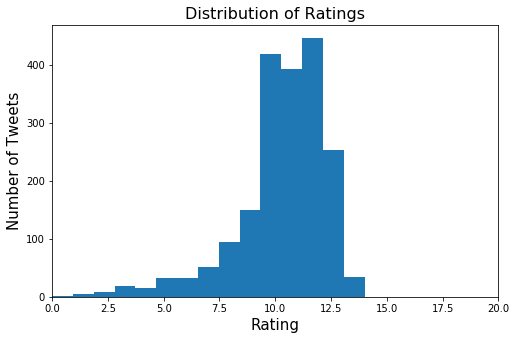

In [121]:
weratedogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 20)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.xlabel('Rating', fontsize = 15)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

In [122]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(weratedogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / weratedogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1544
Percentage of tweets:                79%


In [123]:
# How many tweets have favorite count <= retweet count?
sum(weratedogs.favorite_count <= weratedogs.retweet_count)

0

#### What is the most favourited tweet to date? Top 5?

In [124]:
weratedogs.sort_values(by = 'favorite_count', ascending = False).head(5)

tweet_id                 timestamp  rating  retweet_count  \
306  822872901745569793 2017-01-21 18:26:02+00:00  13      48265           
763  744234799360020481 2016-06-18 18:26:18+00:00  13      79515           
58   879415818425184262 2017-06-26 19:07:24+00:00  13      45849           
395  807106840509214720 2016-12-09 06:17:20+00:00  13      56625           
108  866450705531457537 2017-05-22 00:28:40+00:00  13      32883           

     favorite_count               breed  confidence     name   stage  \
306  132810          Lakeland_terrier    19          None     puppo    
763  131075          Labrador_retriever  82          None     doggo    
58   107956          English_springer    38          Duddles  none     
395  107015          Chihuahua           50          Stephan  none     
108  106827          French_bulldog      90          Jamesy   pupper   

                 source  \
306  Twitter for iPhone   
763  Twitter for iPhone   
58   Twitter for iPhone   
395  Twitter for iPhone   
108  Twitter for iPhone   

                                                                                                                                   text  
306  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc                     
763  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4                 
58   This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY                          
395  This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d                                               
108  This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr

#### What is the most retweeted tweet to date? Top 5.

In [125]:
weratedogs.sort_values(by = 'retweet_count', ascending = False).head(5)

tweet_id                 timestamp  rating  retweet_count  \
763  744234799360020481 2016-06-18 18:26:18+00:00  13      79515           
395  807106840509214720 2016-12-09 06:17:20+00:00  13      56625           
798  739238157791694849 2016-06-04 23:31:25+00:00  13      52360           
306  822872901745569793 2017-01-21 18:26:02+00:00  13      48265           
58   879415818425184262 2017-06-26 19:07:24+00:00  13      45849           

     favorite_count               breed  confidence     name  stage  \
763  131075          Labrador_retriever  82          None     doggo   
395  107015          Chihuahua           50          Stephan  none    
798  75163           Eskimo_dog          50          None     doggo   
306  132810          Lakeland_terrier    19          None     puppo   
58   107956          English_springer    38          Duddles  none    

                 source  \
763  Twitter for iPhone   
395  Twitter for iPhone   
798  Twitter for iPhone   
306  Twitter for iPhone   
58   Twitter for iPhone   

                                                                                                                                           text  
763  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4                         
395  This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d                                                       
798  Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC  
306  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc                             
58   This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY

There are 4 tweets that are in the top 5 for both variables, but the most popular tweet is also the _same_ as the most retweeted tweet; it has been retweeted over 83,000 times and favourited over 164,000 times! 

#### What is the most common stage?

In [126]:
weratedogs.stage.value_counts()

none       1651
pupper     200 
doggo      71  
puppo      23  
floofer    8   
Name: stage, dtype: int64

In [127]:
with_stage_sum = sum(weratedogs.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / weratedogs.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  302
Percentage of tweets:          15%


Only a small proportion of tweets with dog stages identified.

#### What are the 10 most common breeds of dogs tweeted about? (Excluding the category 'none'.)

In [130]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(weratedogs.breed == 'none')
none_perc = none_count * 100 / weratedogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(weratedogs.breed.unique())))

Number of tweets with 'none' predicted breed:  302 (15%)
Number of distinct breeds:  113


In [131]:
top10_breeds_count = \
weratedogs[weratedogs.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / weratedogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      154
Labrador_retriever    103
Pembroke              94 
Chihuahua             90 
pug                   62 
toy_poodle            50 
chow                  47 
Samoyed               42 
Pomeranian            40 
malamute              33 
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


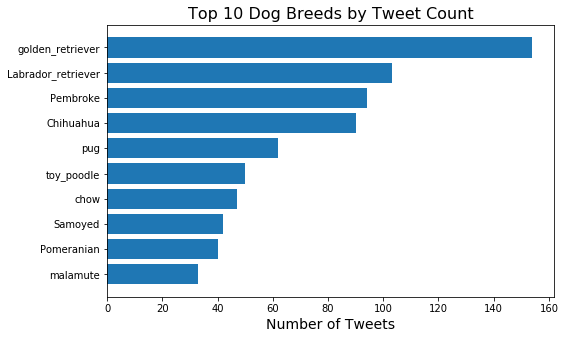

In [132]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The bar chart above shows that the most common dog that is tweeted about, with almost 160 tweets, is the Golden Retriever, as identified (predicted) by the neural network. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place. Further down we'll take a look at what are the most favourited dog breeds.

### Bivariate Analysis

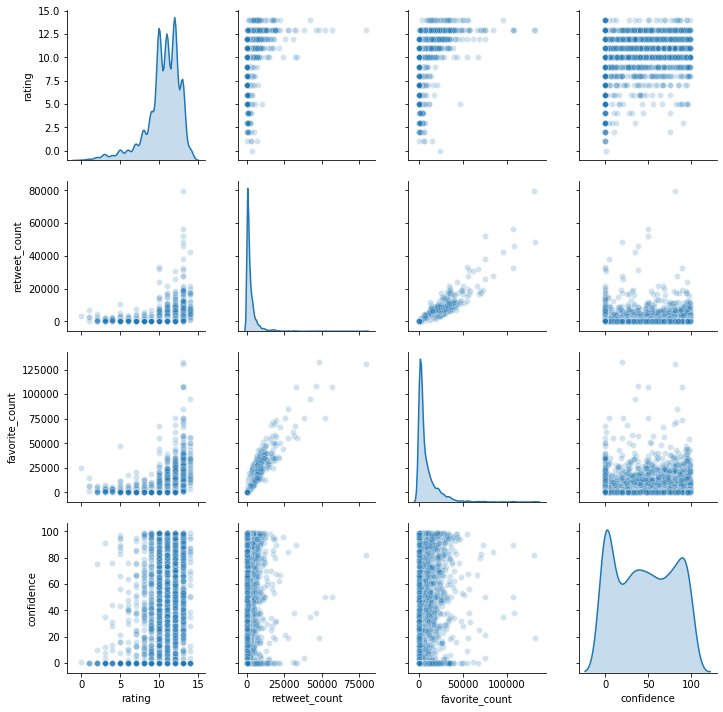

In [134]:
sns.pairplot(weratedogs, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

#### What dog breeds have the highest overall favourite counts?

In [135]:
fav_breed = weratedogs[weratedogs.breed != 'none']
fav_breed = fav_breed.groupby(['breed'])
fav_breed = fav_breed['favorite_count'].sum()
fav_breed = fav_breed.sort_values(ascending = False)
top10_breeds = fav_breed.head(10)
top10_breeds

breed
golden_retriever      1934793
Labrador_retriever    1253364
Pembroke              1038797
Chihuahua             743689 
Samoyed               583906 
French_bulldog        570921 
chow                  443610 
cocker_spaniel        407412 
pug                   383817 
toy_poodle            337270 
Name: favorite_count, dtype: int32

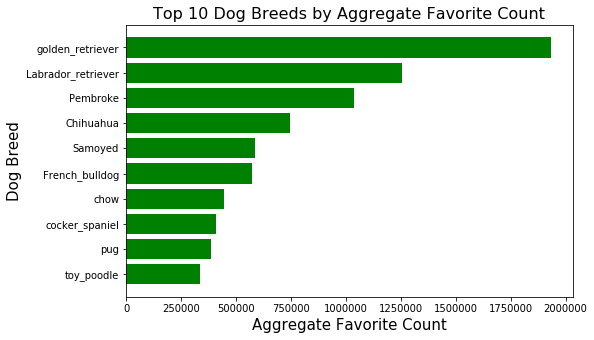

In [136]:
plt.barh(top10_breeds.index, top10_breeds, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 15)
plt.ylabel('Dog Breed', fontsize = 15)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The plot above shows the top 10 dog breeds. It looks very similar to the barplot ealier of top 10 dog breeds ranked by tweet, and in fact the top 4 dog breeds are the same. This makes sense as people often tweet about the dogs they like.

In [137]:
list(set(top10_breeds_count.index) & set(top10_breeds.index))

['chow',
 'Samoyed',
 'Pembroke',
 'toy_poodle',
 'golden_retriever',
 'Chihuahua',
 'pug',
 'Labrador_retriever']

#### How are ratings distributed within each of the dog breeds with highest favourite counts?

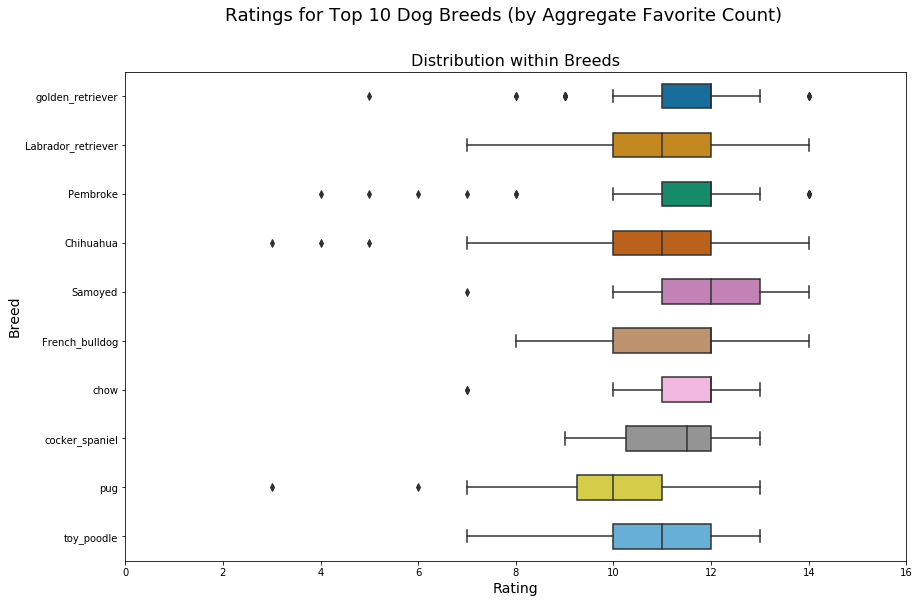

In [138]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = weratedogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

The boxplot here shows the distribution of ratings within each of the top 10 dog breeds as ranked by aggregate favourite count. All the breeds range between 7 and 13, with a only a few outliers, while four of the breeds have the lower ratings at 10. Another four breeds have the highest ratings at 14.

#### How are tweet ratings distributed by day?

In [139]:
# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [141]:
# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days

# start date
first_day = weratedogs.timestamp.min()

# array with days corresponding to timestamp
weratedogs_days = (weratedogs.timestamp - first_day).apply(days_from_start)

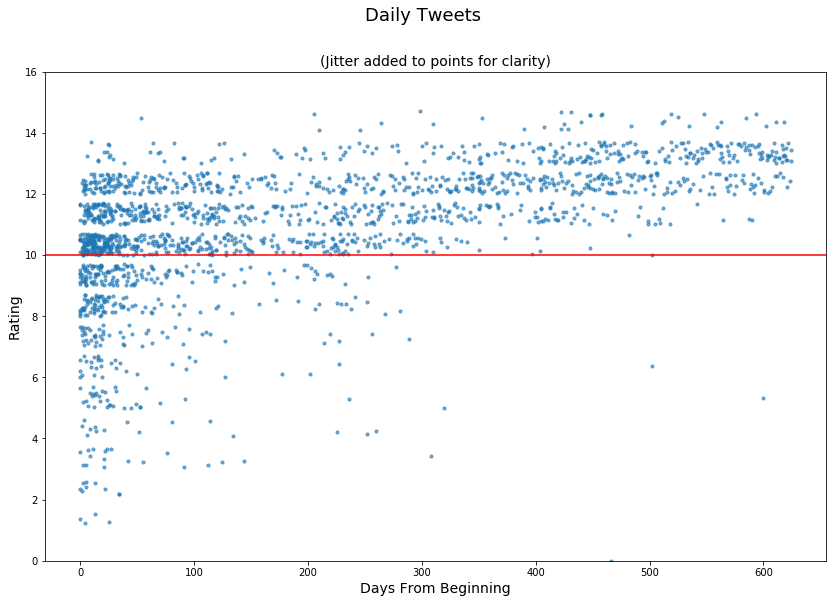

In [142]:
plt.figure(figsize = (14, 9))

# add jitter to the rating so it's not so cluttered on each line
rating_jitter = weratedogs.rating.apply(jitter)

plt.scatter(weratedogs_days, rating_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily Tweets', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'r')
plt.ylim(0, 16)

plt.show();

The plot here has the tweet ratings by day, showing how the ratings are generally over 10 in the latter half of the time period, after the account has been running for 300 days.

### Multivariate Analysis
#### Relationship between favourite and retweet counts with dog rating as colour.

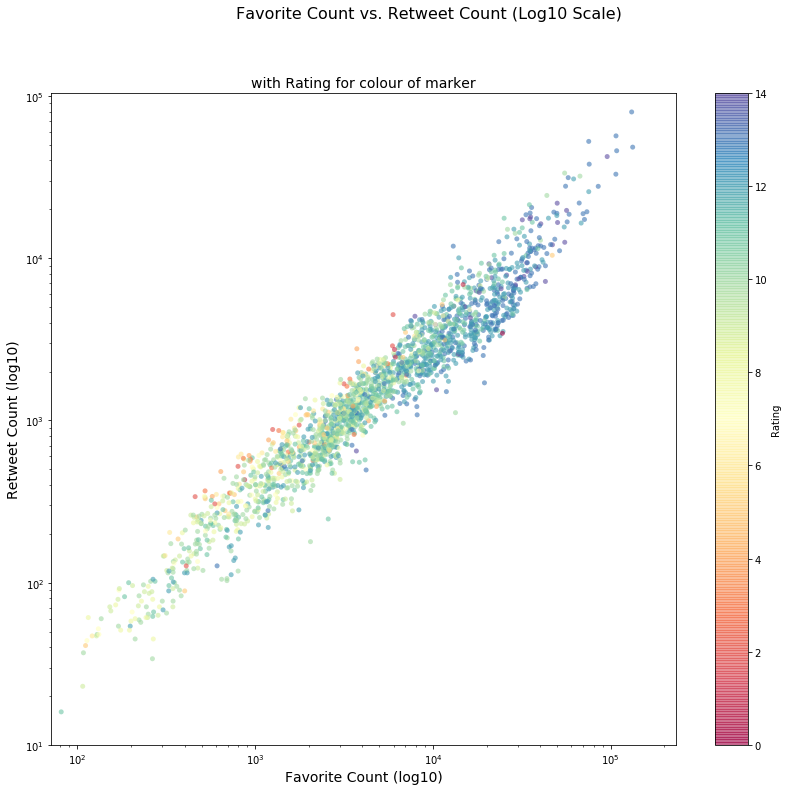

In [143]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

df = weratedogs

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

This plot is showing a few things here, but the overall picture is the strong positive correlation between retweet counts and favorite counts. It does make sense though, personally, if I 'like' a tweet (favourite it) I am more likely to retweet it as well. The tightly packed points follow a distinct linear trend with a positive slope, so as favorite count increases so does the retweet count. Also evident, tweets with high favorite counts and high retweet counts also have higher ratings, as shown by the concentration of blue points.

#### Favourite counts over time, with dog rating as colour.

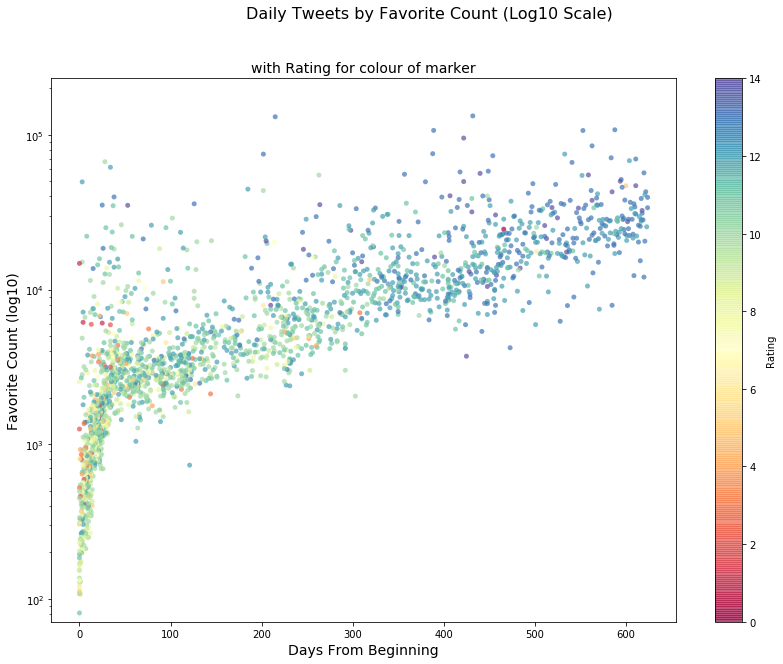

In [146]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(weratedogs['favorite_count'].min() - 10, 
         weratedogs['favorite_count'].max() + 100000)
colours = weratedogs['rating']
markers = 25

plt.scatter(weratedogs_days, weratedogs['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Favorite Count (log10)', fontsize = 14)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

In this plot the x-axis scale is reversed showing time in the past, and moving forward from left to right. Clearly, the more recent tweets (younger/fewer days old on the right side) are rated consistently higher (blue and green) than much older tweets (yellow and green). Also interesting is that tweets older than 1100 days have lower favourite counts; this is most likely because this was at the start of the twitter account, and so there weren't as many followers at the time.

The slope of the line is also increasing at a steady rate from around 1100 days, reflecting the daily increase in tweets being favourited. This clearly shows that the twitter account followers were active, and possibly growing, during the timeframe represented in the archive.

The older tweets also have much more variability in ratings as seen by the range of colours (more yellow and green), and also in the range of favorite_count.